In [1]:
import h2o
from h2o.automl import H2OAutoML

In [2]:
h2o.init()

train = h2o.import_file("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.271-b09, mixed mode)
  Starting server from C:\Users\Somy\AppData\Local\Programs\Python\Python38\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Somy\AppData\Local\Temp\tmpv_gvui2t
  JVM stdout: C:\Users\Somy\AppData\Local\Temp\tmpv_gvui2t\h2o_Somy_started_from_python.out
  JVM stderr: C:\Users\Somy\AppData\Local\Temp\tmpv_gvui2t\h2o_Somy_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,3 months and 1 day
H2O_cluster_name:,H2O_from_python_Somy_scxblw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.418 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
train.types

{'sepal.length': 'real',
 'sepal.width': 'real',
 'petal.length': 'real',
 'petal.width': 'real',
 'variety': 'enum'}

In [7]:
train.describe()

Rows:150
Cols:5




,sepal.length,sepal.width,petal.length,petal.width,variety
type,real,real,real,real,enum
mins,4.3,2.0,1.0,0.1,
mean,5.843333333333333,3.0573333333333315,3.758,1.1993333333333336,
maxs,7.9,4.4,6.9,2.5,
sigma,0.8280661279778637,0.4358662849366979,1.7652982332594664,0.7622376689603467,
zeros,0,0,0,0,
missing,0,0,0,0,0
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [13]:
x=train.columns

In [14]:
y = "variety"

In [15]:
x.remove(y)

In [8]:
train[y] = train[y].asfactor()

In [16]:
aml = H2OAutoML(max_models=10 , seed=10 ,exclude_algos=['DeepLearning','StackedEnsemble'] , verbosity='info',max_runtime_secs =30 )
aml.train(x=x,y=y,training_frame=train)

lb= aml.leaderboard
lb

AutoML progress: |
03:41:43.394: Project: AutoML_20201230_34143394
03:41:43.395: Setting stopping tolerance adaptively based on the training frame: 0.05
03:41:43.395: Build control seed: 10
03:41:43.395: training frame: Frame key: automl_training_Key_Frame__https___gist_githubusercontent_com_netj_8836201_raw_6f9306ad21398ea43cba4f7d537619d0e07d5ae3_iris.hex    cols: 5    rows: 150  chunks: 1    size: 2088  checksum: -2578309190662719028
03:41:43.395: validation frame: NULL
03:41:43.395: leaderboard frame: NULL
03:41:43.395: blending frame: NULL
03:41:43.395: response column: variety
03:41:43.395: fold column: null
03:41:43.395: weights column: null
03:41:43.395: AutoML: XGBoost is not available; skipping it.
03:41:43.396: Loading execution steps: [{XGBoost : defaults}, {GLM : defaults}, {DRF : [def_1]}, {GBM : defaults}, {DeepLearning : defaults}, {DRF : [XRT]}, {XGBoost : grids}, {GBM : grids}, {DeepLearning : grids}, {GBM : [lr_annealing]}, {XGBoost : [lr_search]}, {StackedEnsemble :

model_id,mean_per_class_error,logloss,rmse,mse
GLM_1_AutoML_20201230_034143,0.0266667,0.0674222,0.14835,0.0220077
GBM_2_AutoML_20201230_034143,0.0533333,0.176563,0.218066,0.0475528
GBM_1_AutoML_20201230_034143,0.06,0.20157,0.22591,0.0510352
GBM_3_AutoML_20201230_034143,0.06,0.169085,0.215013,0.0462305
GBM_grid__1_AutoML_20201230_034143_model_1,0.06,0.171683,0.214967,0.0462108
GBM_4_AutoML_20201230_034143,0.06,0.174849,0.218726,0.0478409
XRT_1_AutoML_20201230_034143,0.06,0.143913,0.206788,0.0427612
DRF_1_AutoML_20201230_034143,0.06,0.124985,0.200319,0.0401277
GBM_grid__1_AutoML_20201230_034143_model_2,0.06,0.178342,0.220983,0.0488336
GBM_grid__1_AutoML_20201230_034143_model_3,0.06,0.187721,0.226279,0.0512022


In [18]:
aml.leader.model_performance

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_20201230_034143


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,multinomial,multinomial,Ridge ( lambda = 6.981E-5 ),"nlambda = 30, lambda.max = 43.354, lambda.min = 6.981E-5, lambda.1...",15,12,91,automl_training_Key_Frame__https___gist_githubusercontent_com_netj...




ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.012793834697034498
RMSE: 0.11310983466098118

ModelMetricsMultinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.022007650229148343
RMSE: 0.1483497564175565

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.97333336,0.027888667,0.96666664,1.0,0.96666664,0.93333334,1.0
1,err,0.026666667,0.027888667,0.033333335,0.0,0.033333335,0.06666667,0.0
2,err_count,0.8,0.83666,1.0,0.0,1.0,2.0,0.0
3,logloss,0.06226724,0.037457164,0.049176026,0.042157102,0.0561334,0.12789735,0.03597232
4,max_per_class_error,0.06,0.054772254,0.1,0.0,0.1,0.1,0.0
5,mean_per_class_accuracy,0.97333336,0.027888667,0.96666664,1.0,0.96666664,0.93333334,1.0
6,mean_per_class_error,0.026666667,0.027888667,0.033333335,0.0,0.033333335,0.06666667,0.0
7,mse,0.019739969,0.014354564,0.018269235,0.010598,0.017963644,0.04408078,0.007788189
8,null_deviance,65.91674,NaN,65.91674,65.91674,65.91674,65.91674,65.91674
9,r2,0.97039,0.021531846,0.97259617,0.984103,0.9730545,0.93387884,0.9883177



Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se,training_rmse,training_logloss,training_r2,training_classification_error
0,,2020-12-30 03:41:44,0.000 sec,2,.43E2,15,2.154472,NaN,2.162920,0.001323,,,,
1,,2020-12-30 03:41:44,0.004 sec,4,.27E2,15,2.129674,NaN,2.142824,0.002095,,,,
2,,2020-12-30 03:41:44,0.007 sec,6,.17E2,15,2.091666,NaN,2.111746,0.003281,,,,
3,,2020-12-30 03:41:44,0.011 sec,8,.1E2,15,2.035029,NaN,2.064738,0.005067,,,,
4,,2020-12-30 03:41:44,0.013 sec,10,.64E1,15,1.954066,NaN,1.996096,0.007647,,,,
5,,2020-12-30 03:41:44,0.017 sec,12,.4E1,15,1.845128,NaN,1.900878,0.011178,,,,
6,,2020-12-30 03:41:44,0.021 sec,15,.25E1,15,1.708801,NaN,1.777713,0.015665,,,,
7,,2020-12-30 03:41:44,0.025 sec,18,.15E1,15,1.553036,NaN,1.630465,0.021041,,,,
8,,2020-12-30 03:41:44,0.030 sec,21,.96E0,15,1.389338,NaN,1.470232,0.026952,,,,
9,,2020-12-30 03:41:44,0.035 sec,24,.6E0,15,1.230087,NaN,1.309389,0.033242,,,,



See the whole table with table.as_data_frame()


<bound method ModelBase.model_performance of >

In [56]:
import pandas as pd
model_id = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [60]:
model_id[0]

'GLM_1_AutoML_20201230_034143'

In [62]:
out = h2o.get_model(model_id[0])

In [63]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GLM_1_AutoML_20201230_034143',
   'type': 'Key<Model>',
   'URL': '/3/Models/GLM_1_AutoML_20201230_034143'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Key_Frame__https___gist_githubusercontent_com_netj_8836201_raw_6f9306ad21398ea43cba4f7d537619d0e07d5ae3_iris.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Key_Frame__https___gist_githubusercontent_com_netj_8836201_raw_6f9306ad21398ea43cba4f7d537619d0e07d5ae3_iris.hex'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Key_Frame__https___gist_githubusercontent_com_netj_8836201_raw_6f9306ad21398ea43cba4f7d537619d0e07d5ae3_iris.

In [64]:
out.confusion_matrix

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_20201230_034143


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,multinomial,multinomial,Ridge ( lambda = 6.981E-5 ),"nlambda = 30, lambda.max = 43.354, lambda.min = 6.981E-5, lambda.1...",15,12,91,automl_training_Key_Frame__https___gist_githubusercontent_com_netj...




ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.012793834697034498
RMSE: 0.11310983466098118

ModelMetricsMultinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.022007650229148343
RMSE: 0.1483497564175565

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.97333336,0.027888667,0.96666664,1.0,0.96666664,0.93333334,1.0
1,err,0.026666667,0.027888667,0.033333335,0.0,0.033333335,0.06666667,0.0
2,err_count,0.8,0.83666,1.0,0.0,1.0,2.0,0.0
3,logloss,0.06226724,0.037457164,0.049176026,0.042157102,0.0561334,0.12789735,0.03597232
4,max_per_class_error,0.06,0.054772254,0.1,0.0,0.1,0.1,0.0
5,mean_per_class_accuracy,0.97333336,0.027888667,0.96666664,1.0,0.96666664,0.93333334,1.0
6,mean_per_class_error,0.026666667,0.027888667,0.033333335,0.0,0.033333335,0.06666667,0.0
7,mse,0.019739969,0.014354564,0.018269235,0.010598,0.017963644,0.04408078,0.007788189
8,null_deviance,65.91674,NaN,65.91674,65.91674,65.91674,65.91674,65.91674
9,r2,0.97039,0.021531846,0.97259617,0.984103,0.9730545,0.93387884,0.9883177



Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se,training_rmse,training_logloss,training_r2,training_classification_error
0,,2020-12-30 03:41:44,0.000 sec,2,.43E2,15,2.154472,NaN,2.162920,0.001323,,,,
1,,2020-12-30 03:41:44,0.004 sec,4,.27E2,15,2.129674,NaN,2.142824,0.002095,,,,
2,,2020-12-30 03:41:44,0.007 sec,6,.17E2,15,2.091666,NaN,2.111746,0.003281,,,,
3,,2020-12-30 03:41:44,0.011 sec,8,.1E2,15,2.035029,NaN,2.064738,0.005067,,,,
4,,2020-12-30 03:41:44,0.013 sec,10,.64E1,15,1.954066,NaN,1.996096,0.007647,,,,
5,,2020-12-30 03:41:44,0.017 sec,12,.4E1,15,1.845128,NaN,1.900878,0.011178,,,,
6,,2020-12-30 03:41:44,0.021 sec,15,.25E1,15,1.708801,NaN,1.777713,0.015665,,,,
7,,2020-12-30 03:41:44,0.025 sec,18,.15E1,15,1.553036,NaN,1.630465,0.021041,,,,
8,,2020-12-30 03:41:44,0.030 sec,21,.96E0,15,1.389338,NaN,1.470232,0.026952,,,,
9,,2020-12-30 03:41:44,0.035 sec,24,.6E0,15,1.230087,NaN,1.309389,0.033242,,,,



See the whole table with table.as_data_frame()


<bound method H2OMultinomialModel.confusion_matrix of >

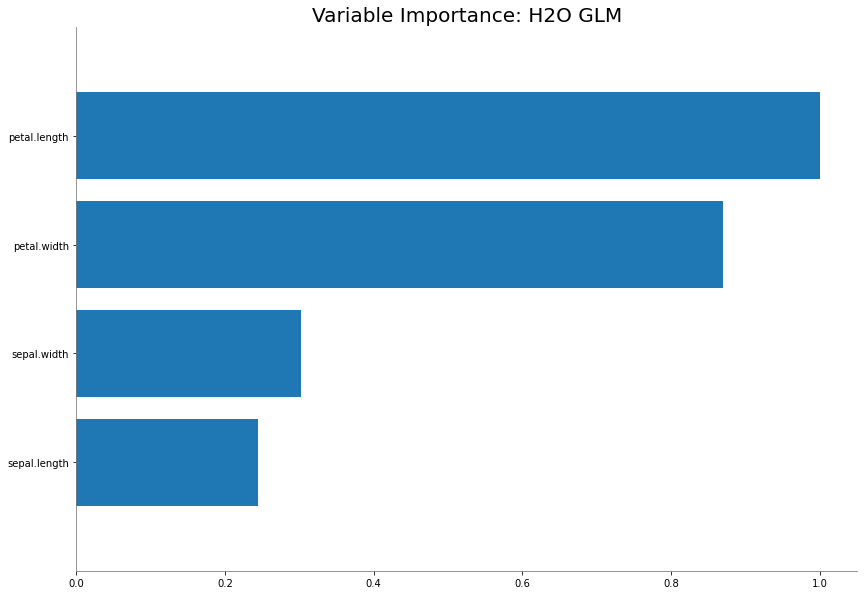

In [65]:
out.varimp_plot()

In [53]:
aml.leader.confusion_matrix

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_20201230_034143


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,multinomial,multinomial,Ridge ( lambda = 6.981E-5 ),"nlambda = 30, lambda.max = 43.354, lambda.min = 6.981E-5, lambda.1...",15,12,91,automl_training_Key_Frame__https___gist_githubusercontent_com_netj...




ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.012793834697034498
RMSE: 0.11310983466098118

ModelMetricsMultinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.022007650229148343
RMSE: 0.1483497564175565

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.97333336,0.027888667,0.96666664,1.0,0.96666664,0.93333334,1.0
1,err,0.026666667,0.027888667,0.033333335,0.0,0.033333335,0.06666667,0.0
2,err_count,0.8,0.83666,1.0,0.0,1.0,2.0,0.0
3,logloss,0.06226724,0.037457164,0.049176026,0.042157102,0.0561334,0.12789735,0.03597232
4,max_per_class_error,0.06,0.054772254,0.1,0.0,0.1,0.1,0.0
5,mean_per_class_accuracy,0.97333336,0.027888667,0.96666664,1.0,0.96666664,0.93333334,1.0
6,mean_per_class_error,0.026666667,0.027888667,0.033333335,0.0,0.033333335,0.06666667,0.0
7,mse,0.019739969,0.014354564,0.018269235,0.010598,0.017963644,0.04408078,0.007788189
8,null_deviance,65.91674,NaN,65.91674,65.91674,65.91674,65.91674,65.91674
9,r2,0.97039,0.021531846,0.97259617,0.984103,0.9730545,0.93387884,0.9883177



Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se,training_rmse,training_logloss,training_r2,training_classification_error
0,,2020-12-30 03:41:44,0.000 sec,2,.43E2,15,2.154472,NaN,2.162920,0.001323,,,,
1,,2020-12-30 03:41:44,0.004 sec,4,.27E2,15,2.129674,NaN,2.142824,0.002095,,,,
2,,2020-12-30 03:41:44,0.007 sec,6,.17E2,15,2.091666,NaN,2.111746,0.003281,,,,
3,,2020-12-30 03:41:44,0.011 sec,8,.1E2,15,2.035029,NaN,2.064738,0.005067,,,,
4,,2020-12-30 03:41:44,0.013 sec,10,.64E1,15,1.954066,NaN,1.996096,0.007647,,,,
5,,2020-12-30 03:41:44,0.017 sec,12,.4E1,15,1.845128,NaN,1.900878,0.011178,,,,
6,,2020-12-30 03:41:44,0.021 sec,15,.25E1,15,1.708801,NaN,1.777713,0.015665,,,,
7,,2020-12-30 03:41:44,0.025 sec,18,.15E1,15,1.553036,NaN,1.630465,0.021041,,,,
8,,2020-12-30 03:41:44,0.030 sec,21,.96E0,15,1.389338,NaN,1.470232,0.026952,,,,
9,,2020-12-30 03:41:44,0.035 sec,24,.6E0,15,1.230087,NaN,1.309389,0.033242,,,,



See the whole table with table.as_data_frame()


<bound method H2OMultinomialModel.confusion_matrix of >